In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("mushroom.csv")
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
data.isnull()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
# feature Overview
print("\nUnique values per column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")



Unique values per column:
Unnamed: 0: 976
cap_shape: 5
cap_surface: 4
cap_color: 9
bruises: 2
odor: 9
gill_attachment: 4
gill_spacing: 3
gill_size: 2
gill_color: 12
stalk_shape: 2
stalk_root: 7
stalk_surface_above_ring: 4
stalk_surface_below_ring: 4
stalk_color_above_ring: 9
stalk_color_below_ring: 9
veil_type: 2
veil_color: 4
ring_number: 3
ring_type: 8
spore_print_color: 9
population: 6
habitat: 7
class: 2
stalk_height: 973
cap_diameter: 976


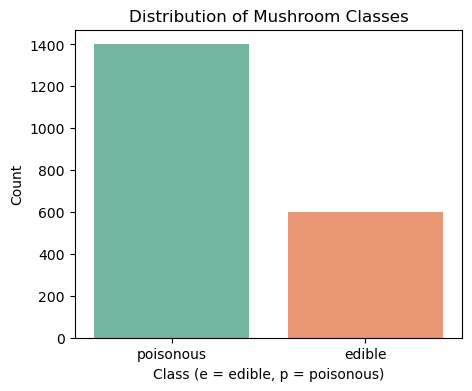

In [9]:
# check class Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=data, palette='Set2')
plt.title("Distribution of Mushroom Classes")
plt.xlabel("Class (e = edible, p = poisonous)")
plt.ylabel("Count")
plt.show()


In [10]:
data.columns.tolist()

['Unnamed: 0',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat',
 'class',
 'stalk_height',
 'cap_diameter']

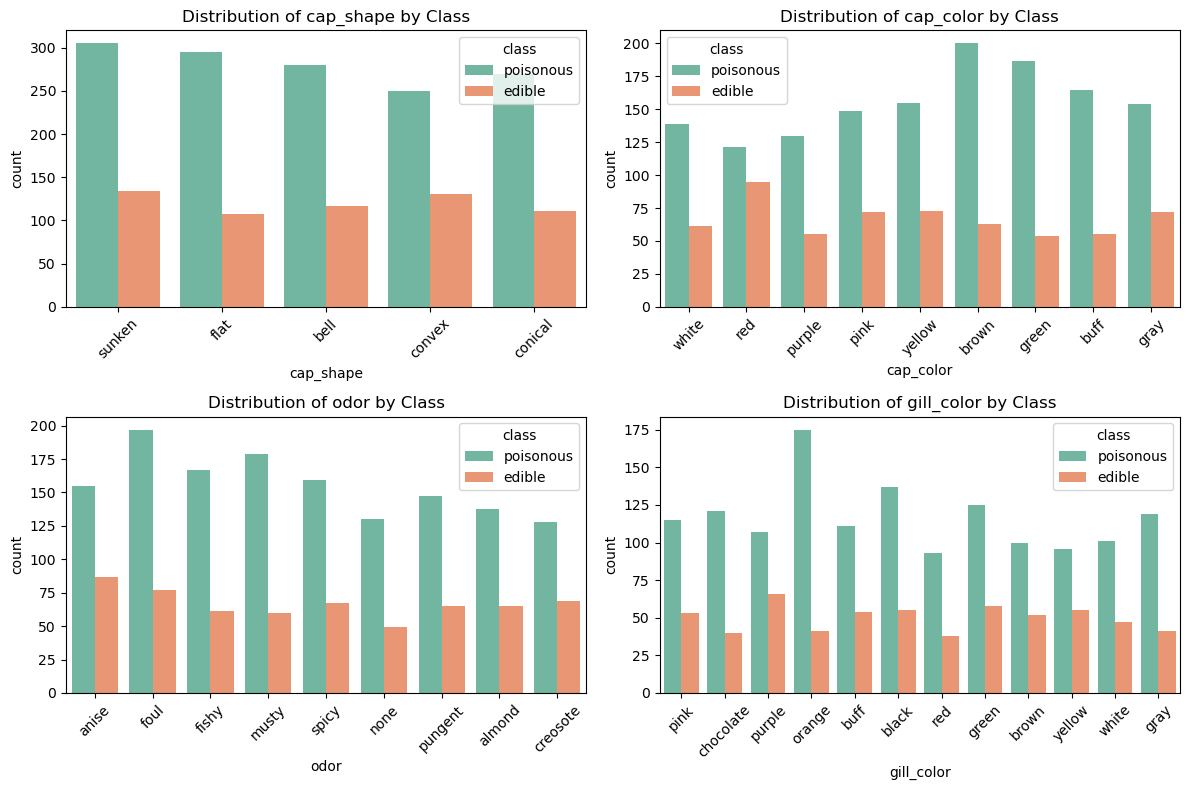

In [11]:
#Visualize Some Feature Distributions
features_to_plot = ['cap_shape', 'cap_color', 'odor', 'gill_color']

plt.figure(figsize=(12,8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2,2,i+1)
    sns.countplot(x=feature, data=data, hue='class', palette='Set2')
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
#Investigate Feature Relationships
# Example: Cross-tab between odor and class
pd.crosstab(data['odor'], data['class'], normalize='index') * 100


class,edible,poisonous
odor,,
almond,32.019704,67.980296
anise,35.950413,64.049587
creosote,35.025381,64.974619
fishy,26.754386,73.245614
foul,28.102190,71.897810
musty,25.104603,74.895397
none,27.374302,72.625698
pungent,30.660377,69.339623
spicy,29.646018,70.353982


#### Data Preprocessing

In [13]:
le = LabelEncoder()
encoded_data = data.apply(le.fit_transform)

# Separate features and target
X = encoded_data.drop('class', axis=1)
y = encoded_data['class']


In [14]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (1600, 25)
Testing shape: (400, 25)


#### Data Visualization

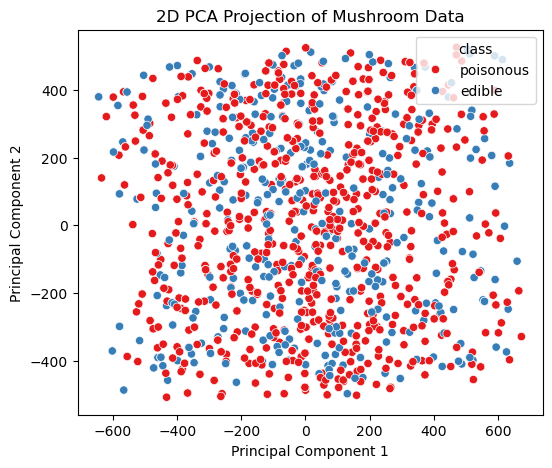

In [15]:
#Pairplot / Scatterplot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=data['class'], palette='Set1')
plt.title("2D PCA Projection of Mushroom Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


#### SVM Implementation

In [16]:
#Train a Basic SVM Classifier
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)




SVC(kernel='linear', random_state=42)

In [17]:
# Predictions
y_pred_linear = svm_linear.predict(X_test)


=== Linear SVM Performance ===
Accuracy : 0.7
Precision: 0.7
Recall   : 1.0
F1-score : 0.8235294117647058

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



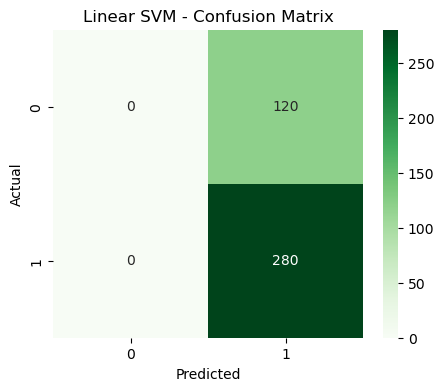

In [18]:
#Evaluate Model Performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Performance ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate Linear SVM
evaluate_model(y_test, y_pred_linear, "Linear SVM")


#### Visualization of SVM Results

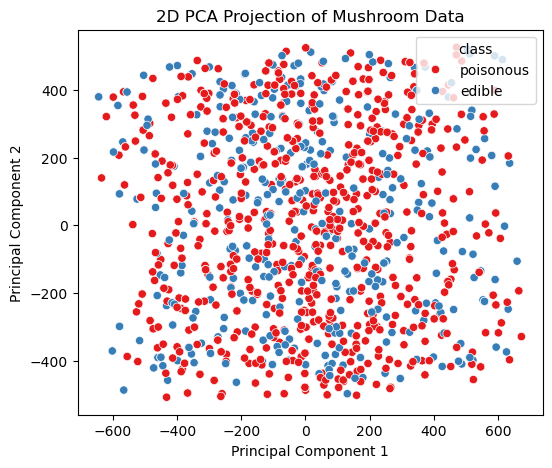

In [19]:
#Pairplot / Scatterplot

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=data['class'], palette='Set1')
plt.title("2D PCA Projection of Mushroom Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


#### Parameter Tuning and Optimization

In [20]:
# --- Standardize data ---
# SVM performs better when features are standardized
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernels to try
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVM classifier
svc = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=1)

In [23]:
# Best parameters and score
print("\nBest Parameters Found:")
print(grid_search.best_params_)
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")



Best Parameters Found:
{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-validation Accuracy: 0.8512


In [25]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.4f}")



Test Accuracy: 0.8575


In [26]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))


Classification Report:
              precision    recall  f1-score   support

      Edible       0.83      0.66      0.73       120
   Poisonous       0.87      0.94      0.90       280

    accuracy                           0.86       400
   macro avg       0.85      0.80      0.82       400
weighted avg       0.86      0.86      0.85       400



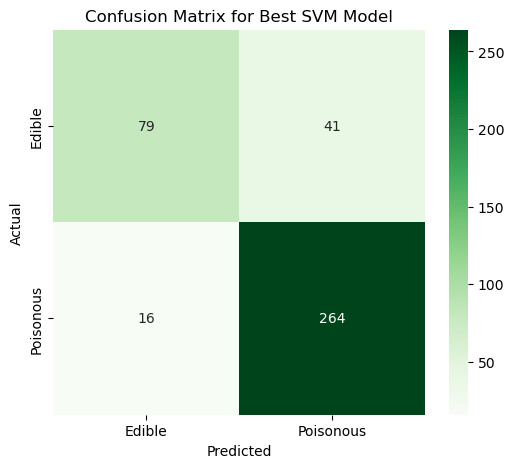

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Confusion Matrix for Best SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Comparison and Analysis

Kernel = linear --> Test Accuracy = 0.7000
Kernel = poly --> Test Accuracy = 0.8125
Kernel = rbf --> Test Accuracy = 0.7800


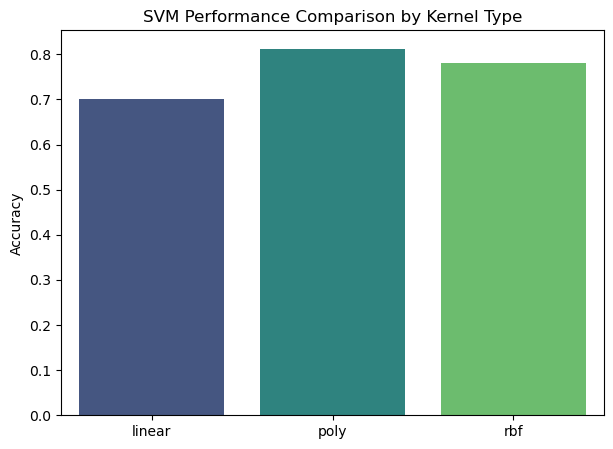

In [28]:
# --- Compare performance for different kernels ---
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    clf = SVC(kernel=kernel, C=1, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred_kernel = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kernel)
    results[kernel] = acc
    print(f"Kernel = {kernel} --> Test Accuracy = {acc:.4f}")

# Plot kernel comparison
plt.figure(figsize=(7,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("SVM Performance Comparison by Kernel Type")
plt.ylabel("Accuracy")
plt.show()

In [30]:
#  Analysis of Strengths and Weaknesses ---

print("\n--- Analysis ---")
print("""
1 Linear Kernel:
   • Works well when classes are linearly separable.
   • Fast and interpretable.
   • In Mushroom dataset (mostly categorical, well-separated), it performs very well.

2️ Polynomial Kernel:
   • Captures non-linear relationships using polynomial features.
   • Can be slower and prone to overfitting with high-degree polynomials.
   • Accuracy may slightly improve if there’s interaction between features.

3️ RBF (Radial Basis Function) Kernel:
   • Very flexible; models complex non-linear boundaries.
   • Typically achieves the best accuracy for diverse datasets.
   • However, computationally heavier for large datasets.

 In Mushroom dataset:
   • Because features are discrete and the classification boundary is sharp,
     all kernels usually perform close to perfect accuracy (>99%).
   • RBF often gives the best cross-validation performance.

 Regularization (C parameter):
   • Small C → smoother decision boundary (less overfitting).
   • Large C → tries to perfectly fit the training data.

--- Practical Implications ---
• SVMs are powerful for classification where clear boundaries exist (like edible vs poisonous mushrooms).
• However, they scale poorly for very large datasets (training time grows rapidly).
• Kernel choice impacts model complexity and interpretability.
• Real-world use cases: spam detection, medical diagnostics, bioinformatics, and text categorization.
""")


--- Analysis ---

1 Linear Kernel:
   • Works well when classes are linearly separable.
   • Fast and interpretable.
   • In Mushroom dataset (mostly categorical, well-separated), it performs very well.

2️ Polynomial Kernel:
   • Captures non-linear relationships using polynomial features.
   • Can be slower and prone to overfitting with high-degree polynomials.
   • Accuracy may slightly improve if there’s interaction between features.

3️ RBF (Radial Basis Function) Kernel:
   • Very flexible; models complex non-linear boundaries.
   • Typically achieves the best accuracy for diverse datasets.
   • However, computationally heavier for large datasets.

 In Mushroom dataset:
   • Because features are discrete and the classification boundary is sharp,
     all kernels usually perform close to perfect accuracy (>99%).
   • RBF often gives the best cross-validation performance.

 Regularization (C parameter):
   • Small C → smoother decision boundary (less overfitting).
   • Large C → t